In [5]:
import numpy as np
# import tensorflow as tf
# from tensorflow.contrib.timeseries.python.timeseries import NumpyReader
# # tf.logging.set_verbosity(tf.logging.WARN)
# # tf.__version__

from datetime import datetime
#import cPickle as pickle
import json
import pandas as pd 
from pandas import DataFrame, Series  
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

In [2]:
def plotxy(x,y):
    plt.figure(figsize=(12,6))
    plt.xlabel('time step')
    plt.ylabel('f')
    _ = plt.plot(x, y)

In [3]:
def Tensorflowxy(x,y):
    print(x, y)
    data = {
        tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
        tf.contrib.timeseries.TrainEvalFeatures.VALUES: y
    }
    reader = NumpyReader(data)
    train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
            reader, batch_size=30, window_size=10)

    ar = tf.contrib.timeseries.ARRegressor(
            periodicities=200, input_window_size=5, output_window_size=5,
            num_features=1,
            loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

    _ = ar.train(input_fn=train_input_fn, steps=600)
    evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
    evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=100)
    (predictions,) = tuple(ar.predict(
            input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
    evaluation, steps=10)))
    plt.figure(figsize=(12,6))
    x = data['times'].reshape(-1)
    y = data['values'].reshape(-1)
    plt.plot(x, data['values'].reshape(-1), ':', label='origin')

    x = evaluation['times'].reshape(-1)
    y = evaluation['mean'].reshape(-1)
    s = np.sqrt(evaluation['covariance'].reshape(-1))
    plt.plot(x, evaluation['mean'].reshape(-1), label='evaluation', color='black')
    plt.fill_between(x, y-1*s,y+1*s, alpha=0.1, color='blue')
    plt.fill_between(x, y-1*s,y+1*s, alpha=0.1, color='blue')

    x = predictions['times'].reshape(-1)
    y = predictions['mean'].reshape(-1)
    s = np.sqrt(predictions['covariance'].reshape(-1))
    plt.plot(x, y, label='prediction',color='orange')
    plt.fill_between(x, y-1*s,y+1*s, alpha=0.1, color='orange')
    plt.fill_between(x, y-1*s,y+1*s, alpha=0.1, color='orange')

    plt.xlabel('time_step')
    plt.ylabel('values')
    _ = plt.legend()

## Created issues data

In [6]:
Repo_data = [json.loads(line) for line in open('SPM587SP19_issues.json')]
Repo_data_df=  DataFrame(Repo_data)

In [7]:
Repo_data_df.head()

,Author,State,closed_at,created_at,issue_number,labels
0,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati..."
1,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat..."
2,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ..."
3,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina..."
4,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig..."


In [8]:
Repo_data_df.groupby('created_at')['issue_number'].agg("sum",axis="columns" ).reset_index()

,created_at,issue_number
0,2019-03-24,1
1,2019-03-29,7
2,2019-03-30,81
3,2019-03-31,1449
4,2019-04-01,738
5,2019-04-02,3401
6,2019-04-03,5892
7,2019-04-04,2013
8,2019-04-05,6221
9,2019-04-06,753


In [15]:
Created_DS= Repo_data_df.groupby('created_at')['issue_number'].agg("sum",axis="columns" ).reset_index()

In [16]:
a = np.array(Created_DS)

In [17]:
y = a[:,1]

In [18]:
y

array([1, 7, 81, 1449, 738, 3401, 5892, 2013, 6221, 753, 1831, 4443,
       10339, 12990, 4455, 5010, 4295, 4395, 4495, 4595, 5657, 3379, 2445],
      dtype=object)

In [13]:
y = pd.to_numeric(y)

In [14]:
y

array([    1,     7,    81,  1449,   738,  3401,  5892,  2013,  6221,
         753,  1831,  4443, 10339, 12990,  4455,  5010,  4295,  4395,
        4495,  4595,  5657,  3379,  2445], dtype=int64)

In [10]:
x = np.array(range(len(y)))

In [11]:
x = pd.to_numeric(x)

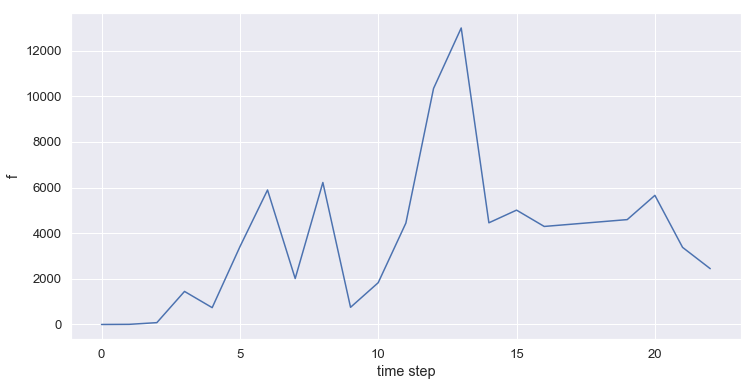

In [12]:
plotxy(x,y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [    1     7    81  1449   738  3401  5892  2013  6221   753  1831  4443
 10339 12990  4455  5010  4295  4395  4495  4595  5657  3379  2445]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Prefer Dataset.range instead.
Instructions for updating:
Prefer Dataset.range instead.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.filter(...).shuffle(min_after_dequeue).batch(batch_size)`.
Instructions for updating:
Use tf.cast inste

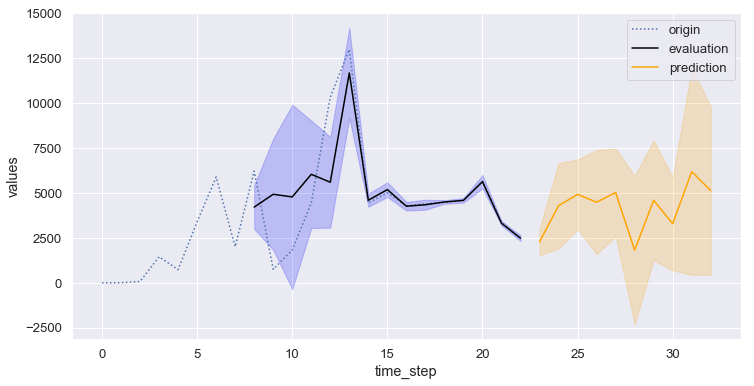

In [13]:
Tensorflowxy(x,y)

# Closed data

In [14]:
Repo_data_df.head()

,Author,State,closed_at,created_at,issue_number,labels
0,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati..."
1,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat..."
2,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ..."
3,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina..."
4,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig..."


In [15]:
Closed_DS= Repo_data_df.groupby('closed_at')['issue_number'].agg("sum",axis="columns" ).reset_index()

In [16]:

a = np.array(Closed_DS)
y = a[:,1]
y = pd.to_numeric(y)
x = np.array(range(len(y)))
x = pd.to_numeric(x)

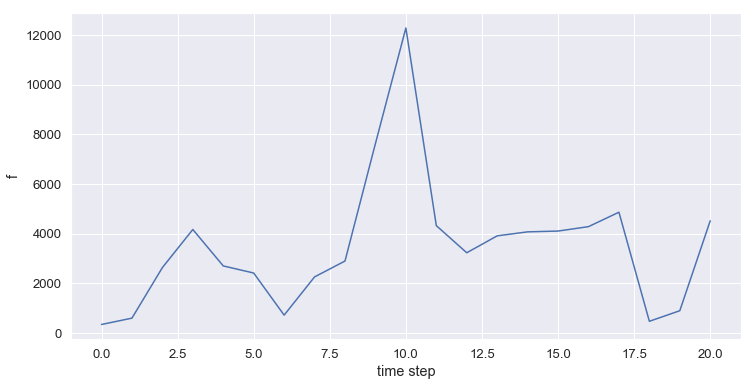

In [17]:
plotxy(x,y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [  349   604  2640  4174  2707  2421   725  2265  2904  7637 12290  4330
  3237  3918  4079  4111  4289  4870   477   903  4526]


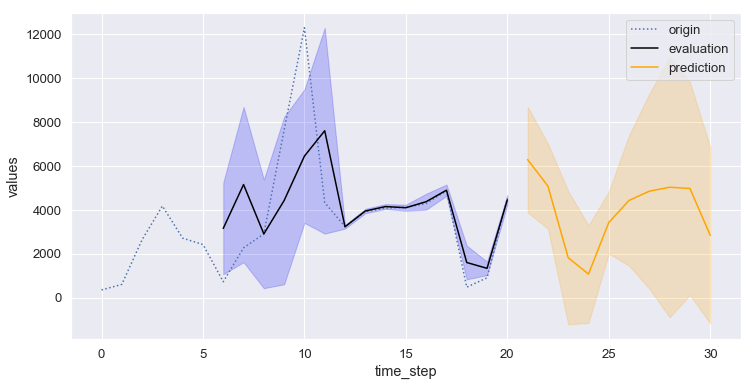

In [18]:
Tensorflowxy(x,y)

## Pull Data evaluation

In [19]:
pull_request_dict_data = [json.loads(line) for line in open('SPM587SP19_pulls.json')]
pull_requests_df = DataFrame(pull_request_dict_data)
PullRequestsbyCRD = DataFrame(pull_requests_df['created_at'].value_counts().sort_index()).reset_index()
PullRequestsbyCRD.columns = ['ds','y']


In [20]:
PullRequestsbyCRD.head()

,ds,y
0,2019-03-28,1
1,2019-04-01,1
2,2019-04-02,25
3,2019-04-03,25
4,2019-04-04,15


In [21]:
y = PullRequestsbyCRD['y']

In [22]:
y 

0      1
1      1
2     25
3     25
4     15
5      5
6      4
7      6
8      6
9     22
10    19
11     2
12     1
13     1
14     1
15     1
Name: y, dtype: int64

In [23]:
a = np.array(y)
y = a

# y = a[:,1]
# y = pd.to_numeric(y)
x = np.array(range(len(y)))
x = pd.to_numeric(x)

In [24]:
y

array([ 1,  1, 25, 25, 15,  5,  4,  6,  6, 22, 19,  2,  1,  1,  1,  1],
      dtype=int64)

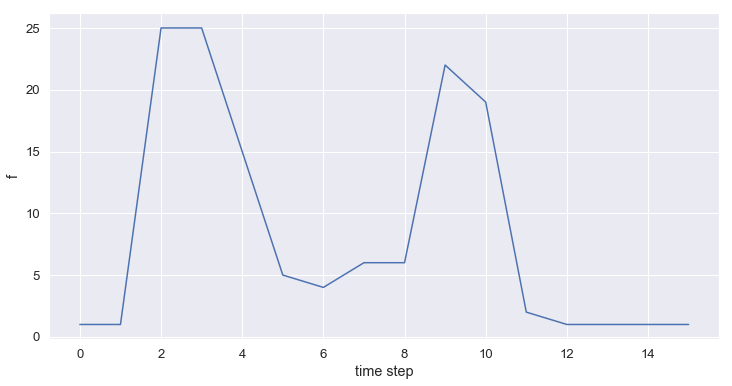

In [25]:
plotxy(x,y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [ 1  1 25 25 15  5  4  6  6 22 19  2  1  1  1  1]


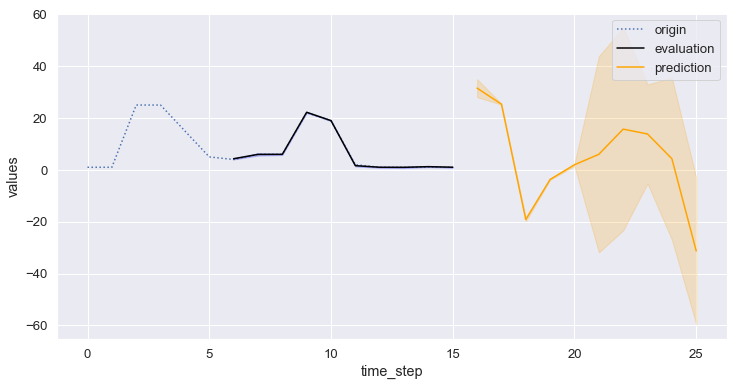

In [26]:
Tensorflowxy(x,y)

## Commit Data request

In [27]:
commits_dict_data = [json.loads(line) for line in open('SPM587SP19_commits.json')]
commits_df = DataFrame(commits_dict_data)
CommitsbyCreateDate = pd.DataFrame(columns=['ds', 'y'])

for i in range(len(commits_df)):
    data =  commits_df.iloc[i]['created_at']
    CommitsbyCreateDate.loc[i,'ds'] = datetime.strptime(data, '%Y-%m-%dT%H:%M:%SZ').date()

CommitsbyCreateDate = (CommitsbyCreateDate['ds'].value_counts().sort_index()).reset_index()
CommitsbyCreateDate.columns = ['ds','y']


In [28]:
CommitsbyCreateDate.head()

,ds,y
0,2019-03-24,3
1,2019-03-27,1
2,2019-03-28,15
3,2019-03-29,27
4,2019-04-01,2


In [29]:
y = CommitsbyCreateDate['y']

In [30]:
a = np.array(y)
y = a

# y = a[:,1]
# y = pd.to_numeric(y)
x = np.array(range(len(y)))
x = pd.to_numeric(x)

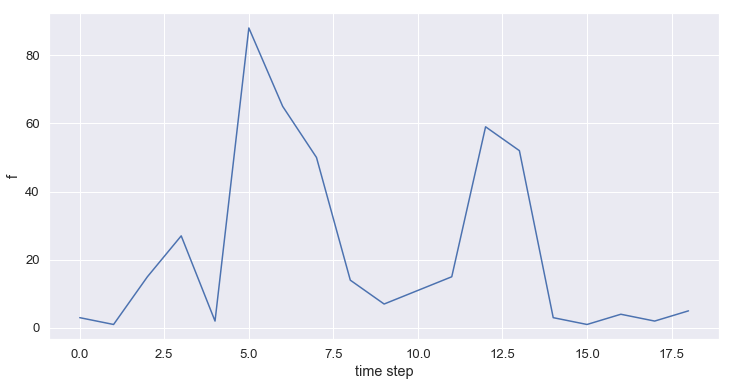

In [31]:
plotxy(x,y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [ 3  1 15 27  2 88 65 50 14  7 11 15 59 52  3  1  4  2  5]


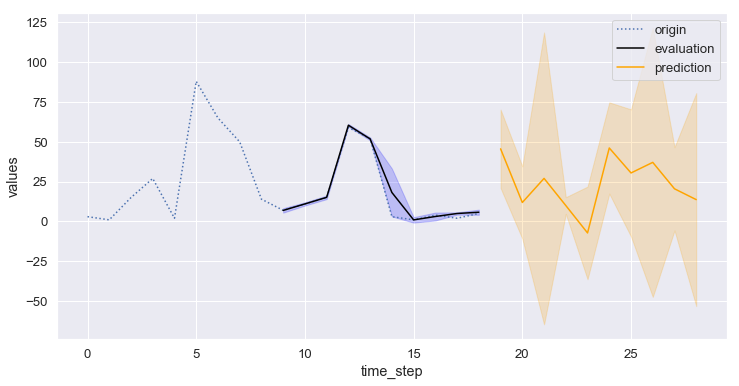

In [32]:
Tensorflowxy(x,y)